In [2]:
import numpy as np
from scipy import interpolate, misc
import matplotlib.pyplot as plt
from PIL import Image

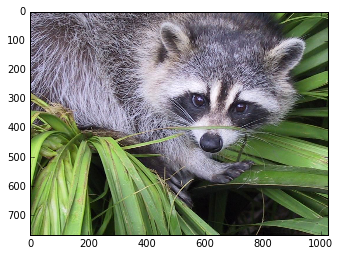

In [9]:
face = misc.face()
plt.imshow(face);

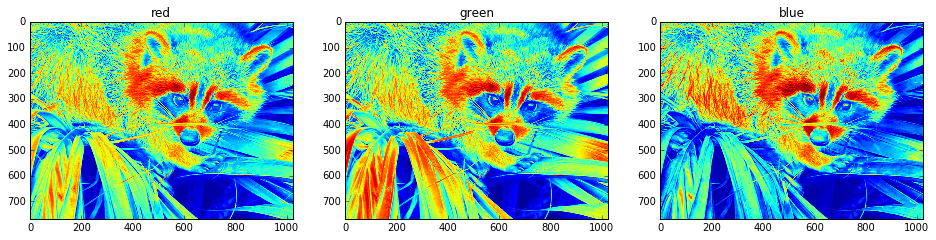

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
for i, channel in enumerate(('red', 'green', 'blue')):
    locals()[channel] = face[:, :, i]
    ax = locals()['ax' + str(i+1)]
    ax.imshow(face[:, :, i])
    ax.set_title(channel)

In [127]:
def random_sample_2d(a, size):
    random_indexes = np.array(list(zip(np.random.randint(0, red.shape[0], size).tolist(), 
                                       np.random.randint(0, red.shape[1], size).tolist())))
    values = a[random_indexes[:, 0], random_indexes[:, 1]]
    return random_indexes, values

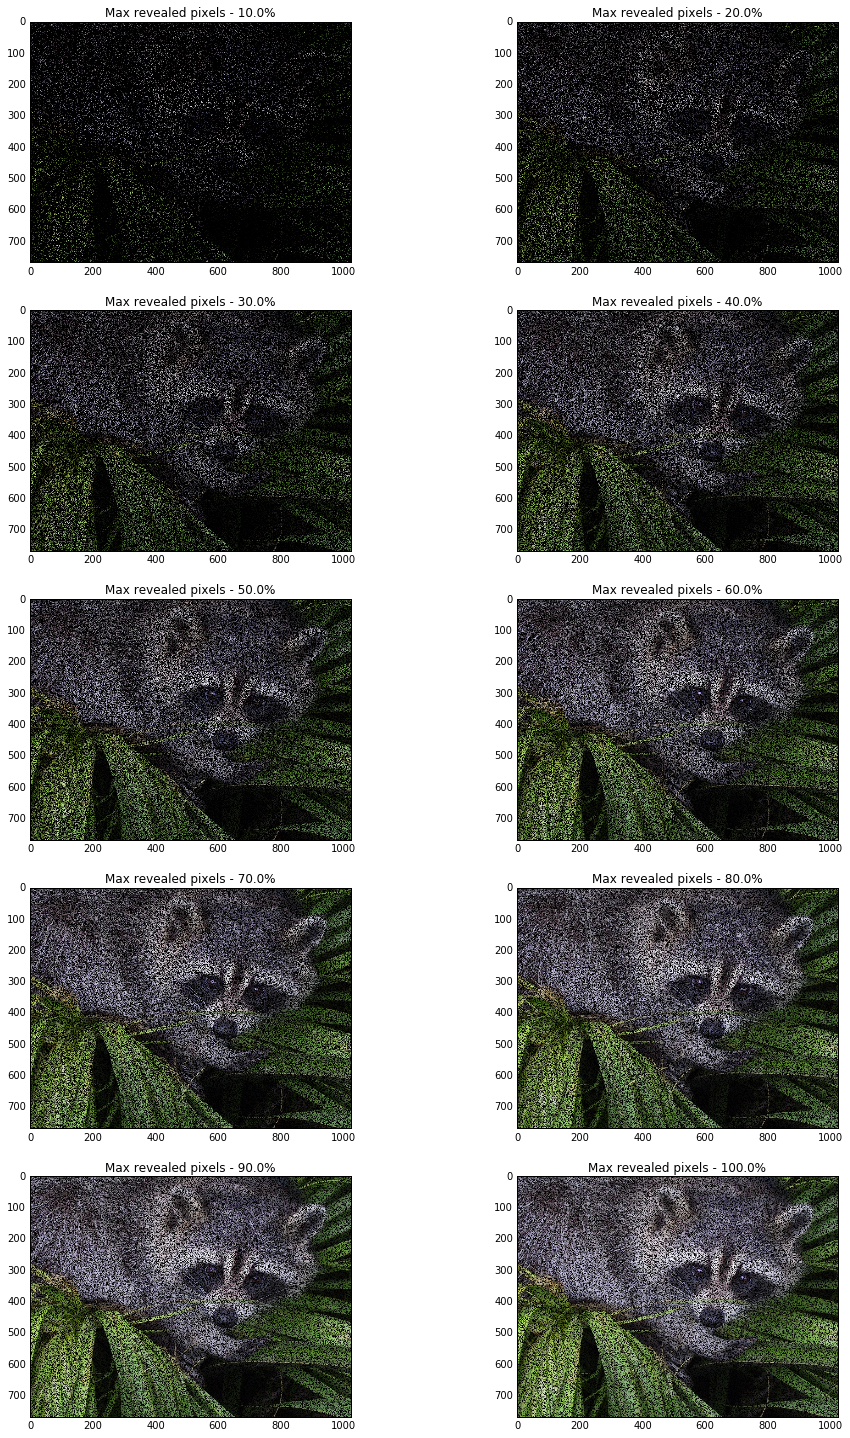

In [320]:
# Could you distinguish what's on the picture seen 10% of pixels max?
fig, axes = plt.subplots(5, 2, figsize=(16, 25))
for i in range(0, 10):
    m = (i + 1) / 10  # percentage of revealed pixels
    random_indexes, values = random_sample_2d(face, int(face.shape[0] * face.shape[1] * m))
    new_image = np.zeros_like(face)
    new_image[random_indexes[:, 0], random_indexes[:, 1]] = values
    ax = axes[i // 2][i % 2]
    ax.imshow(new_image)
    ax.set_title("Max revealed pixels - %.1f%%" % (m * 100))

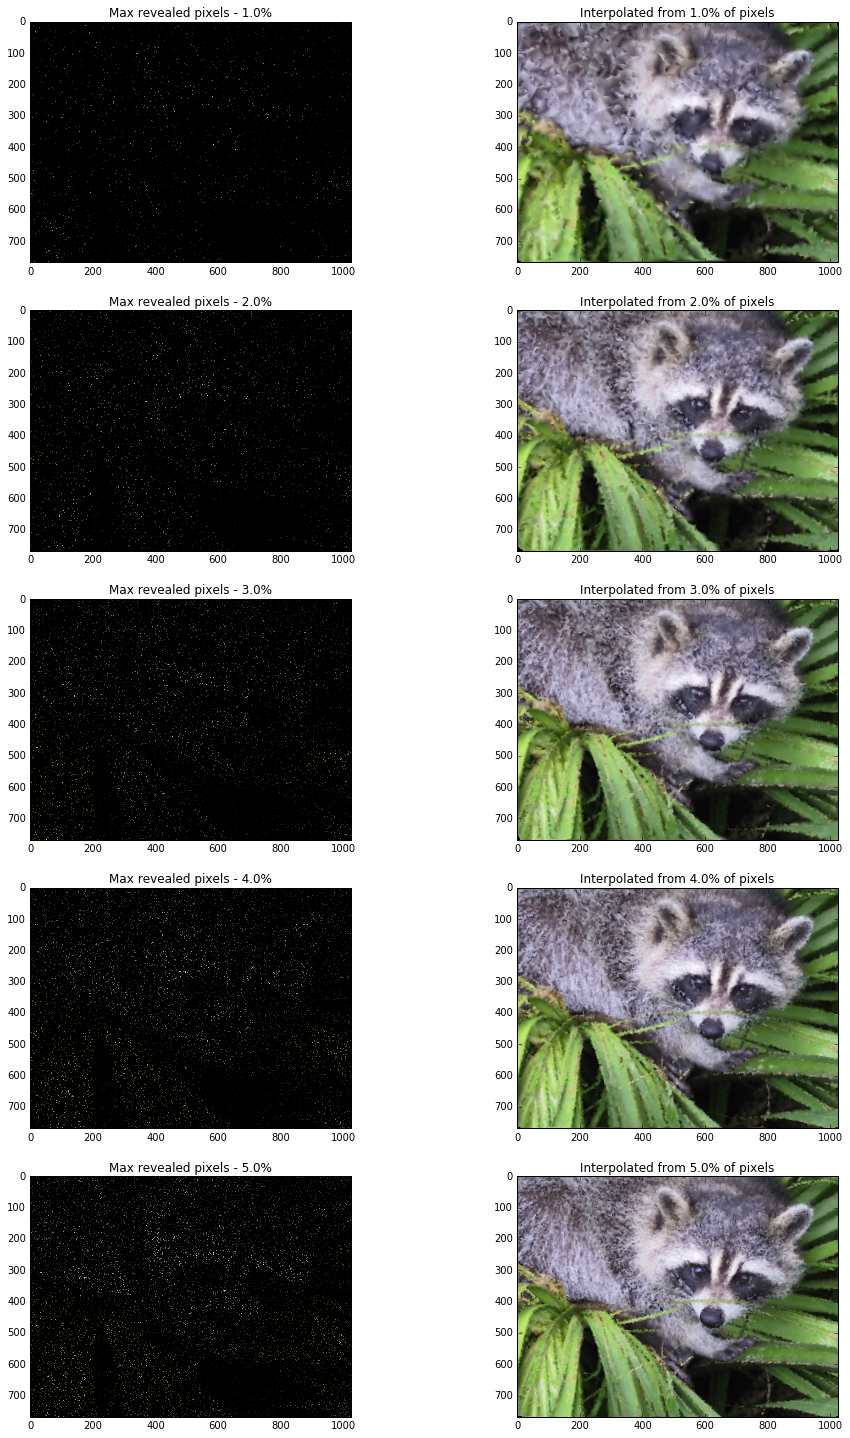

In [336]:
# interpolate.interp2d would be a better choice but it raises a memory error...
fig, axes = plt.subplots(5, 2, figsize=(16, 25))
for i in range(0, 5):
    m = (i + 1) / 100  # percentage of revealed pixels
    random_indexes, values = random_sample_2d(face, int(face.shape[0] * face.shape[1] * m))
    new_image = np.zeros_like(face)
    new_image[random_indexes[:, 0], random_indexes[:, 1]] = values
    ax = axes[i][0]
    ax.imshow(new_image)
    ax.set_title("Max revealed pixels - %.1f%%" % (m * 100))
    ax = axes[i][1]
    ax.set_title("Interpolated from %.1f%% of pixels" % (m * 100))
    grid_x, grid_y = np.mgrid[0:face.shape[0]:1, 0:face.shape[1]:1]
    interpolated_r = interpolate.griddata(random_indexes, values[:, 0], (grid_x, grid_y)).astype(np.uint8)
    interpolated_g = interpolate.griddata(random_indexes, values[:, 1], (grid_x, grid_y)).astype(np.uint8)
    interpolated_b = interpolate.griddata(random_indexes, values[:, 2], (grid_x, grid_y)).astype(np.uint8)
    ax.imshow(np.dstack([interpolated_r, interpolated_g, interpolated_b]).reshape(face.shape[0], face.shape[1], 3))

In [334]:
# Pretty good results. The picture is distinguishable even been interpolated from 1% of pixels.